In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import pandas as pd, numpy as np

%matplotlib inline

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions

In [2]:
path = './data/train/bee'
name = '20997149292_3b5fd09795_m.jpg'
fullname = f'{path}/{name}'


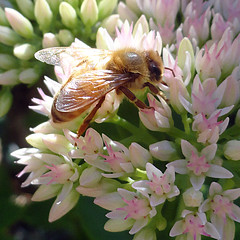

In [3]:
load_img(fullname)

### Building the Model

Develop the model with following structure:

- The shape for input should be (150, 150, 3)
- Next, create a convolutional layer (Conv2D):
    - Use 32 filters
    - Kernel size should be (3, 3) (that's the size of the filter)
    - Use 'relu' as activation
- Reduce the size of the feature map with max pooling (MaxPooling2D)
    - Set the pooling size to (2, 2)
    - Turn the multi-dimensional result into vectors using a Flatten layer
- Next, add a Dense layer with 64 neurons and 'relu' activation
- Finally, create the Dense layer with 1 neuron - this will be the output
    - The output layer should have an activation - use the appropriate activation for the binary classification case
- As optimizer use SGD with the following parameters:
    - SGD(lr=0.002, momentum=0.8)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [73]:
def make_model(learning_rate=0.002, size_inner=64, size_output=1, momentum=0.8):
    
    inputs = keras.Input(shape=(150,150,3))

    #Convolutional layer with 32 filters and filter of (3,3) and relu activation
    base_model = keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3))
    base = base_model(inputs)

    #Pooling with (2,2) 
    pooling = keras.layers.MaxPooling2D(pool_size=(2,2))
    vectors = pooling(base)
    
    #flatten the vectors
    flatten = keras.layers.Flatten()
    flat_vectors = flatten(vectors)
    
    inner = keras.layers.Dense(units=size_inner, activation='relu')(flat_vectors)
    
    outputs = keras.layers.Dense(units=size_output, activation='sigmoid')(inner)
    model = keras.Model(inputs, outputs)
    

    optimizer = keras.optimizers.SGD(learning_rate=learning_rate,momentum=momentum)

    
    model.compile(optimizer=optimizer, loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
    
    return model

### Question 1

Since we have a binary classification problem, what is the best loss function for us?

- mean squared error
- binary crossentropy
- categorical crossentropy
- cosine similarity

The best loss function is binary cross entropy, which is normally used for binary classification problems.
- mean squared error is used for regression problems
- categorical crossentropy is used for multiclass classification problems.
- cosine simliarity is used for NLP and reccomendation systems

### Question 2

What's the number of parameters in the convolutional layer of our model? You can use the summary method for that.

- 1
- 65
- 896
- 11214912

In [74]:
model = make_model()

In [75]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 175232)            0         
                                                                 
 dense_16 (Dense)            (None, 64)                11214912  
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                           

### Generators and Training

For the next two questions, use the following data generator for both train and test sets:

- ImageDataGenerator(rescale=1./255)

- We don't need to do any additional pre-processing for the images.
- When reading the data from train/test directories, check the class_mode parameter. Which value should it be for a binary  classification problem?
- Use batch_size=20
- Use shuffle=True for both training and test sets.

In [76]:
train_gen = ImageDataGenerator(rescale=1./255)
train_ds = train_gen.flow_from_directory('./data/train/', 
                              target_size=(150, 150), 
                              batch_size=20,
                                        shuffle=True,
                                        class_mode='binary')
test_gen = ImageDataGenerator(rescale=1./255)
test_ds = test_gen.flow_from_directory('./data/test/', 
                              target_size=(150, 150), 
                              batch_size=20,
                                      shuffle=True,
                                      class_mode='binary')

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


The class mode parameter indicates 2 classes for the train and test set.

In [77]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
184/184 [==============================] - 8s 44ms/step - loss: 0.6776 - accuracy: 0.5752 - val_loss: 0.6180 - val_accuracy: 0.6612
Epoch 2/10
184/184 [==============================] - 9s 49ms/step - loss: 0.6253 - accuracy: 0.6486 - val_loss: 0.5867 - val_accuracy: 0.6983
Epoch 3/10
184/184 [==============================] - 8s 44ms/step - loss: 0.5970 - accuracy: 0.6794 - val_loss: 0.5788 - val_accuracy: 0.7113
Epoch 4/10
184/184 [==============================] - 8s 42ms/step - loss: 0.5445 - accuracy: 0.7305 - val_loss: 0.5305 - val_accuracy: 0.7484
Epoch 5/10
184/184 [==============================] - 8s 44ms/step - loss: 0.5113 - accuracy: 0.7528 - val_loss: 0.5315 - val_accuracy: 0.7364
Epoch 6/10
184/184 [==============================] - 8s 43ms/step - loss: 0.4817 - accuracy: 0.7846 - val_loss: 0.5022 - val_accuracy: 0.7712
Epoch 7/10
184/184 [==============================] - 8s 44ms/step - loss: 0.4579 - accuracy: 0.8034 - val_loss: 0.5385 - val_accuracy: 0.7309

### Question 3

What is the median training accuracy for all epochs for this model

In [79]:
np.median(history.history['accuracy'])

0.7686972916126251

### Question 4

What is the stdev of training loss for all epochs for this model.

In [80]:
round(np.std(history.history['loss']),4)

0.0903

### Data Augmentation

Add the following augmentations to your training data generator:

- rotation_range=50,
- width_shift_range=0.1,
- height_shift_range=0.1,
- zoom_range=0.1,
- horizontal_flip=True,
- fill_mode='nearest'

In [83]:
train_gen = ImageDataGenerator(rescale=1./255,rotation_range=50,
                                        width_shift_range=0.1,
                                        height_shift_range=0.1,
                                        zoom_range=0.1,
                                        horizontal_flip=True,
                                        fill_mode='nearest')
train_ds = train_gen.flow_from_directory('./data/train/', 
                              target_size=(150, 150), 
                              batch_size=20,
                                        shuffle=True,
                                         class_mode='binary'
                                )
test_gen = ImageDataGenerator(rescale=1./255)
test_ds = test_gen.flow_from_directory('./data/test/', 
                              target_size=(150, 150), 
                              batch_size=20,
                                      shuffle=True,
                                      class_mode='binary')

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [84]:
history_aug = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
184/184 [==============================] - 22s 122ms/step - loss: 0.5438 - accuracy: 0.7308 - val_loss: 0.4832 - val_accuracy: 0.7625
Epoch 2/10
184/184 [==============================] - 23s 123ms/step - loss: 0.4869 - accuracy: 0.7691 - val_loss: 0.4871 - val_accuracy: 0.7712
Epoch 3/10
184/184 [==============================] - 22s 122ms/step - loss: 0.4837 - accuracy: 0.7819 - val_loss: 0.4705 - val_accuracy: 0.7854
Epoch 4/10
184/184 [==============================] - 22s 121ms/step - loss: 0.4867 - accuracy: 0.7773 - val_loss: 0.5013 - val_accuracy: 0.7527
Epoch 5/10
184/184 [==============================] - 22s 122ms/step - loss: 0.4727 - accuracy: 0.7857 - val_loss: 0.4548 - val_accuracy: 0.7952
Epoch 6/10
184/184 [==============================] - 22s 122ms/step - loss: 0.4720 - accuracy: 0.7841 - val_loss: 0.5231 - val_accuracy: 0.7549
Epoch 7/10
184/184 [==============================] - 22s 121ms/step - loss: 0.4624 - accuracy: 0.7895 - val_loss: 0.4571 - val_ac

###  Question 5

What is the mean test loss for all epochs for model trained with augmentations

In [85]:
np.mean(history_aug.history['val_loss'])

0.4819479674100876

###  Question 6

What is the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

In [86]:
np.mean(history_aug.history['val_accuracy'][-5:])

0.7803921461105346